# Package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [ ]:
# folder_path = "Result/Ind_VS_NInd_3_6"

# for filename in os.listdir(folder_path):
#     if "NNL.MGP" in filename:
#         new_filename = filename.replace("NNL.MGP", "L.DKMGP")
#         old_file = os.path.join(folder_path, filename)
#         new_file = os.path.join(folder_path, new_filename)
#         os.rename(old_file, new_file)
#         print(f'Renamed: {filename} -> {new_filename}')

# print("Done")

# Ind Vs. NInd

## Data

In [13]:
data_dir = "Result/Ind_VS_NInd_3_6"
files = os.listdir(data_dir)

ind_files = [f for f in files if f.endswith("Ind.csv") and not f.endswith("NInd.csv")]
nind_files = [f for f in files if f.endswith("NInd.csv")]

local_models = ['L.GP', 'L.MGP', 'L.DKGP', 'L.DKMGP']
global_models = ['VGP', 'MVGP', 'DGP', 'NN']

data = {}

def load_data(files, suffix):
    temp_data = {}
    for f in files:
        key = f.replace(f'_MSE_{suffix}.csv', '')
        df = pd.read_csv(os.path.join(data_dir, f))
        temp_data[key + f'_{suffix}'] = df.iloc[:, 2]
    return temp_data

data.update(load_data(ind_files, 'Ind'))
data.update(load_data(nind_files, 'NInd'))

all_models = local_models + global_models
ordered_keys = []

for model in all_models:
    ordered_keys.append(f'{model}_Ind')
    ordered_keys.append(f'{model}_NInd')

data_for_plot = [data[key] for key in ordered_keys if key in data]
labels = [key.replace('_', '-') for key in ordered_keys if key in data]

In [ ]:
plt.figure(figsize=(16, 7))
positions = []
gap = 1.5
spacing = 0.5
current_pos = 1

for i in range(0, len(data_for_plot), 2):
    positions.append(current_pos)
    positions.append(current_pos + spacing)
    current_pos += gap

plt.boxplot(data_for_plot, positions=positions, patch_artist=True)
plt.axvline(x=(positions[len(local_models) * 2 - 1] + spacing), color='gray', linestyle='--', linewidth=1)
plt.xticks(positions, labels, rotation=45, fontweight='bold', fontstyle='italic', fontsize=12)
# plt.title("Comparison of MSE between Ind and NInd Dataset")  # B&B
plt.ylabel("MSE of Parameter Estimation", fontweight='bold', fontsize=16)
plt.xlabel("Methods", fontweight='bold', fontsize=16)
plt.ylim(0,0.0005)
plt.tight_layout()

# --------------------------------------------------------------------------
medians = [d.median() for d in data_for_plot]
lowest_median = min(medians)
lowest_index = medians.index(lowest_median)
lowest_label = labels[lowest_index]
lowest_xpos = positions[lowest_index]

plt.axhline(y=lowest_median, color='red', linestyle='--', linewidth=1, label='Lowest median MSE')


plt.text(
    x=lowest_xpos, 
    y=lowest_median + 0.00005, 
    s=f'Lowest: {lowest_label} = {lowest_median:.8f}',
    color='red',
    ha='center',
    va='bottom', 
    fontsize=12
)

plt.legend()
# --------------------------------------------------------------------------

plt.show()


# CD8to4

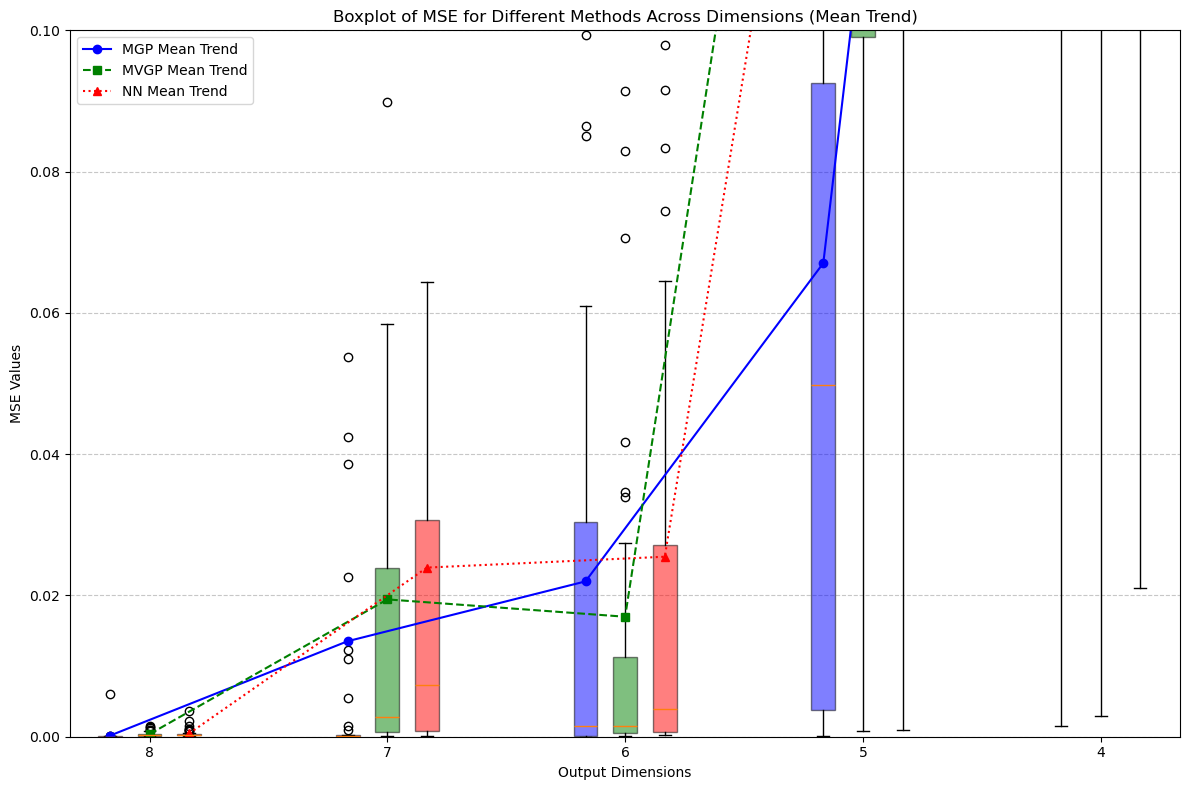

In [2]:
# Load the datasets
file_path_mgp = 'Result/CD8to4/L.MGP_MSE_8to4.csv'
file_path_mvgp = 'Result/CD8to4/MVGP_MSE_8to4.csv'
file_path_nn = 'Result/CD8to4/NN_MSE_8to4.csv'

data = pd.read_csv(file_path_mgp)
data_mvgp = pd.read_csv(file_path_mvgp)
data_nn = pd.read_csv(file_path_nn)

# Prepare the datasets
columns_mgp = data.columns[1:]  # Columns for the first dataset (MGP)
columns_mvgp = data_mvgp.columns[1:]  # Columns for the second dataset (MVGP)
columns_nn = data_nn.columns[1:]  # Columns for the third dataset (NN)

# Adjust x-axis labels and spacing
x_labels = ["8", "7", "6", "5", "4"]
positions_mgp = [i * 3 + 1 for i in range(len(x_labels))]  # Larger gaps between dimensions
positions_mvgp = [pos + 0.5 for pos in positions_mgp]  # Smaller gaps between methods
positions_nn = [pos + 0.5 for pos in positions_mvgp]

# Calculate mean values for each method
mean_mgp = data[columns_mgp].mean().values
mean_mvgp = data_mvgp[columns_mvgp].mean().values
mean_nn = data_nn[columns_nn].mean().values

# Create the plot
plt.figure(figsize=(12, 8))

# Plot MGP boxplot
box_mgp = plt.boxplot(data[columns_mgp].values, patch_artist=True,
                      positions=positions_mgp, 
                      boxprops=dict(facecolor="blue", alpha=0.5), widths=0.3)
# Plot MVGP boxplot
box_mvgp = plt.boxplot(data_mvgp[columns_mvgp].values, patch_artist=True, 
                       positions=positions_mvgp, 
                       boxprops=dict(facecolor="green", alpha=0.5), widths=0.3)
# Plot NN boxplot
box_nn = plt.boxplot(data_nn[columns_nn].values, patch_artist=True, 
                     positions=positions_nn, 
                     boxprops=dict(facecolor="red", alpha=0.5), widths=0.3)

# Add connecting lines for means
plt.plot(positions_mgp, mean_mgp, color="blue", marker="o", linestyle="-", label="MGP Mean Trend")
plt.plot(positions_mvgp, mean_mvgp, color="green", marker="s", linestyle="--", label="MVGP Mean Trend")
plt.plot(positions_nn, mean_nn, color="red", marker="^", linestyle=":", label="NN Mean Trend")

# Enhance plot with labels, title, and legend
plt.title("Boxplot of MSE for Different Methods Across Dimensions (Mean Trend)")
plt.xlabel("Output Dimensions")
plt.ylabel("MSE Values")
plt.xticks([(positions_mgp[i] + positions_nn[i]) / 2 for i in range(len(x_labels))], x_labels)
plt.legend()
plt.ylim(0, 0.1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


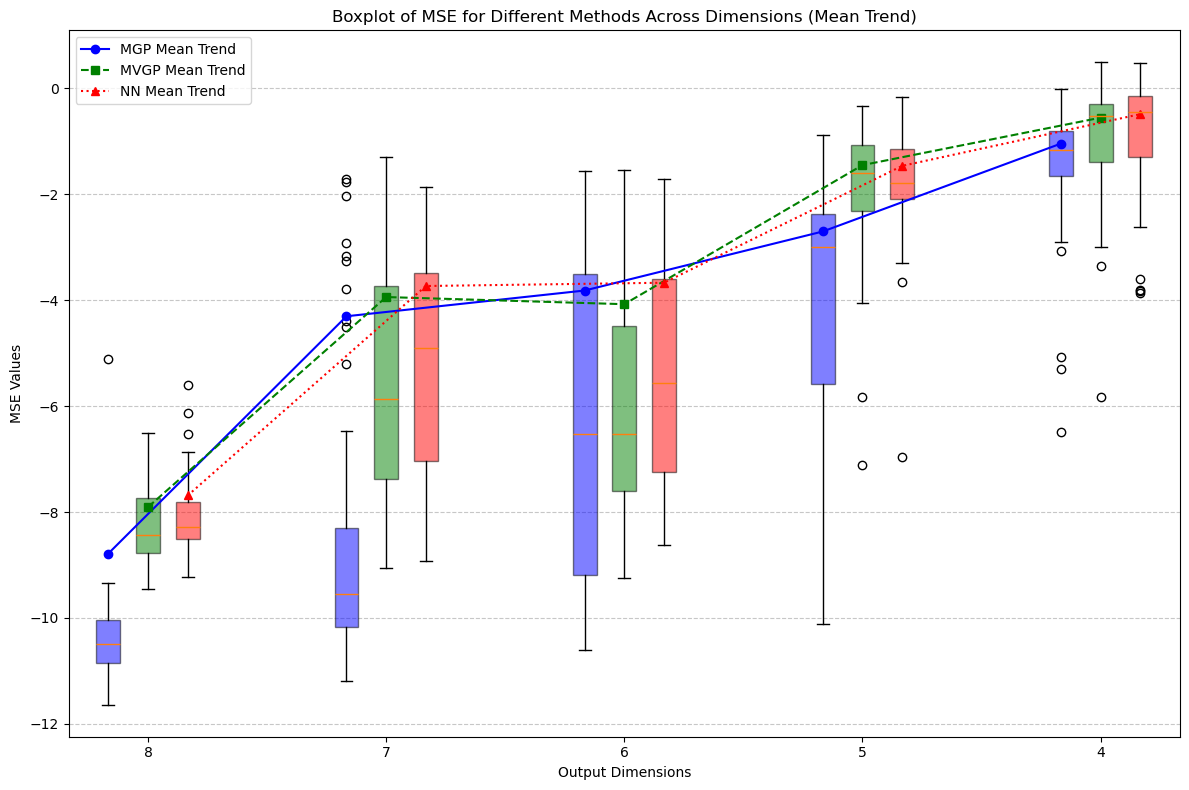

In [3]:
# Load the datasets
file_path_mgp = 'Result/CD8to4/L.MGP_MSE_8to4.csv'
file_path_mvgp = 'Result/CD8to4/MVGP_MSE_8to4.csv'
file_path_nn = 'Result/CD8to4/NN_MSE_8to4.csv'

data = pd.read_csv(file_path_mgp)
data_mvgp = pd.read_csv(file_path_mvgp)
data_nn = pd.read_csv(file_path_nn)

# Prepare the datasets
columns_mgp = data.columns[1:]  # Columns for the first dataset (MGP)
columns_mvgp = data_mvgp.columns[1:]  # Columns for the second dataset (MVGP)
columns_nn = data_nn.columns[1:]  # Columns for the third dataset (NN)

# Adjust x-axis labels and spacing
x_labels = ["8", "7", "6", "5", "4"]
positions_mgp = [i * 3 + 1 for i in range(len(x_labels))]  # Larger gaps between dimensions
positions_mvgp = [pos + 0.5 for pos in positions_mgp]  # Smaller gaps between methods
positions_nn = [pos + 0.5 for pos in positions_mvgp]

# Calculate mean/median values for each method
mean_mgp = np.log(data[columns_mgp].mean().values)
mean_mvgp = np.log(data_mvgp[columns_mvgp].mean().values)
mean_nn = np.log(data_nn[columns_nn].mean().values)

# log
data[columns_mgp] = data[columns_mgp].apply(np.log)
data_mvgp[columns_mvgp] = data_mvgp[columns_mvgp].apply(np.log)
data_nn[columns_nn] = data_nn[columns_nn].apply(np.log)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot MGP boxplot
box_mgp = plt.boxplot(data[columns_mgp].values, patch_artist=True,
                      positions=positions_mgp, 
                      boxprops=dict(facecolor="blue", alpha=0.5), widths=0.3)
# Plot MVGP boxplot
box_mvgp = plt.boxplot(data_mvgp[columns_mvgp].values, patch_artist=True, 
                       positions=positions_mvgp, 
                       boxprops=dict(facecolor="green", alpha=0.5), widths=0.3)
# Plot NN boxplot
box_nn = plt.boxplot(data_nn[columns_nn].values, patch_artist=True, 
                     positions=positions_nn, 
                     boxprops=dict(facecolor="red", alpha=0.5), widths=0.3)

# Add connecting lines for means/medians Mean Median
plt.plot(positions_mgp, mean_mgp, color="blue", marker="o", linestyle="-", label="MGP Mean Trend")
plt.plot(positions_mvgp, mean_mvgp, color="green", marker="s", linestyle="--", label="MVGP Mean Trend")
plt.plot(positions_nn, mean_nn, color="red", marker="^", linestyle=":", label="NN Mean Trend")

# Enhance plot with labels, title, and legend
plt.title("Boxplot of MSE for Different Methods Across Dimensions (Mean Trend)")
plt.xlabel("Output Dimensions")
plt.ylabel("MSE Values")
plt.xticks([(positions_mgp[i] + positions_nn[i]) / 2 for i in range(len(x_labels))], x_labels)
plt.legend()
# plt.ylim(0, 0.1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
mean_summary = pd.DataFrame({
    "Dimension": x_labels,
    "L.MGP Mean": mean_mgp,
    "MVGP Mean": mean_mvgp,
    "NN Mean": mean_nn
})

mean_summary

# Data Size

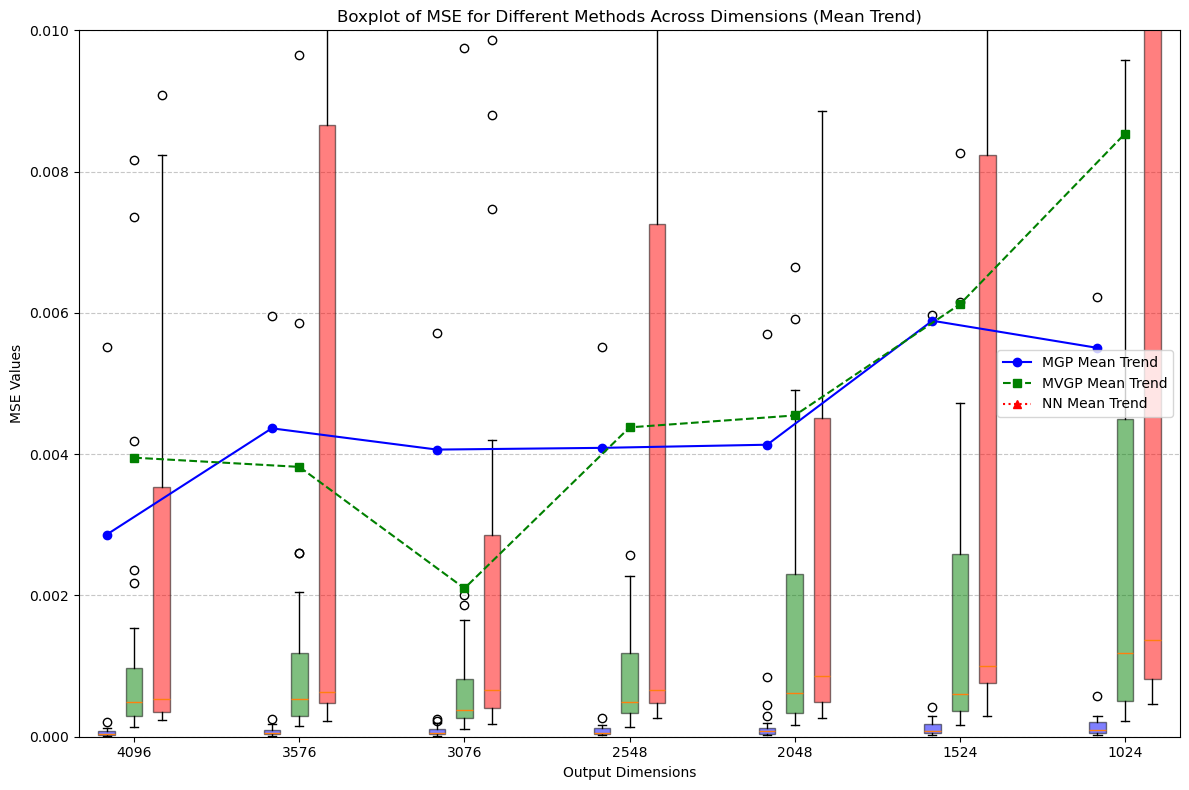

In [10]:
# Load the datasets
file_path_mgp = 'Result/DataSize/L.MGP_MSE_datasize.csv'
file_path_mvgp = 'Result/DataSize/MVGP_MSE_datasize.csv'
file_path_nn = 'Result/DataSize/NN_MSE_datasize.csv'

# file_path_mgp = 'Result/L.MGP_MSE_datasize.csv'
# file_path_mvgp = 'Result/MVGP_MSE_datasize.csv'
# file_path_nn = 'Result/NN_MSE_datasize.csv'

data = pd.read_csv(file_path_mgp)
data_mvgp = pd.read_csv(file_path_mvgp)
data_nn = pd.read_csv(file_path_nn)

# Prepare the datasets
columns_mgp = data.columns[1:]  # Columns for the first dataset (MGP)
columns_mvgp = data_mvgp.columns[1:]  # Columns for the second dataset (MVGP)
columns_nn = data_nn.columns[1:]  # Columns for the third dataset (NN)

# Calculate mean values for each method
# mean_mgp = np.log(data[columns_mgp].mean().values)
# mean_mvgp = np.log(data_mvgp[columns_mvgp].mean().values)
# mean_nn = np.log(data_nn[columns_nn].mean().values)

mean_mgp = data[columns_mgp].mean().values
mean_mvgp = data_mvgp[columns_mvgp].mean().values
mean_nn = data_nn[columns_nn].mean().values

# log
# data[columns_mgp] = data[columns_mgp].apply(np.log)
# data_mvgp[columns_mvgp] = data_mvgp[columns_mvgp].apply(np.log)
# data_nn[columns_nn] = data_nn[columns_nn].apply(np.log)


# Adjust x-axis labels and spacing
x_labels = ["4096", "3576", "3076", "2548", "2048", "1524", "1024"]
positions_mgp = [i * 3 + 1 for i in range(len(x_labels))]  # Larger gaps between dimensions
positions_mvgp = [pos + 0.5 for pos in positions_mgp]  # Smaller gaps between methods
positions_nn = [pos + 0.5 for pos in positions_mvgp]

# Create the plot
plt.figure(figsize=(12, 8))

# Plot MGP boxplot
box_mgp = plt.boxplot(data[columns_mgp].values, patch_artist=True,
                      positions=positions_mgp, 
                      boxprops=dict(facecolor="blue", alpha=0.5), widths=0.3)
# Plot MVGP boxplot
box_mvgp = plt.boxplot(data_mvgp[columns_mvgp].values, patch_artist=True, 
                       positions=positions_mvgp, 
                       boxprops=dict(facecolor="green", alpha=0.5), widths=0.3)
# Plot NN boxplot
box_nn = plt.boxplot(data_nn[columns_nn].values, patch_artist=True, 
                     positions=positions_nn, 
                     boxprops=dict(facecolor="red", alpha=0.5), widths=0.3)

# Add connecting lines for means
plt.plot(positions_mgp, mean_mgp, color="blue", marker="o", linestyle="-", label="MGP Mean Trend")
plt.plot(positions_mvgp, mean_mvgp, color="green", marker="s", linestyle="--", label="MVGP Mean Trend")
plt.plot(positions_nn, mean_nn, color="red", marker="^", linestyle=":", label="NN Mean Trend")

# Enhance plot with labels, title, and legend
plt.title("Boxplot of MSE for Different Methods Across Dimensions (Mean Trend)")
plt.xlabel("Output Dimensions")
plt.ylabel("MSE Values")
plt.xticks([(positions_mgp[i] + positions_nn[i]) / 2 for i in range(len(x_labels))], x_labels)
plt.legend()
plt.ylim(0, 0.01)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


# End